# PyTorch Functional Transforms for Computer Vision

ten PyTorch Functional Transforms most used in computer vision and image processing using PyTorch. PyTorch provides the torchvision library to perform different types of computer vision-related tasks. The functional transforms can be accessed from the torchvision.transforms.functional module. A functional transform gives more control of the transformation as it does not contain a random number generator as a parameter. We can specify/generate all parameters in functional transforms.

Most of the functional transforms accept both PIL images and tensor images. A tensor image is a tensor with shape (C, H, W), where C is the number of channels, H and W are the height and width of the image. Before going into details of each of the transforms, let’s first import the required library/ package/ module and read the image:

In [1]:
import torchvision.transforms.functional as F
import torch
from PIL import Image

image = Image.open('yourImage.jpg')


We imported the torchvision.transforms.functional module as F. In all functional transforms discussed below we use F instead of using torchvision.transforms.functional. We read the below image as a PIL image. We use the below image as the input image for all transforms. 

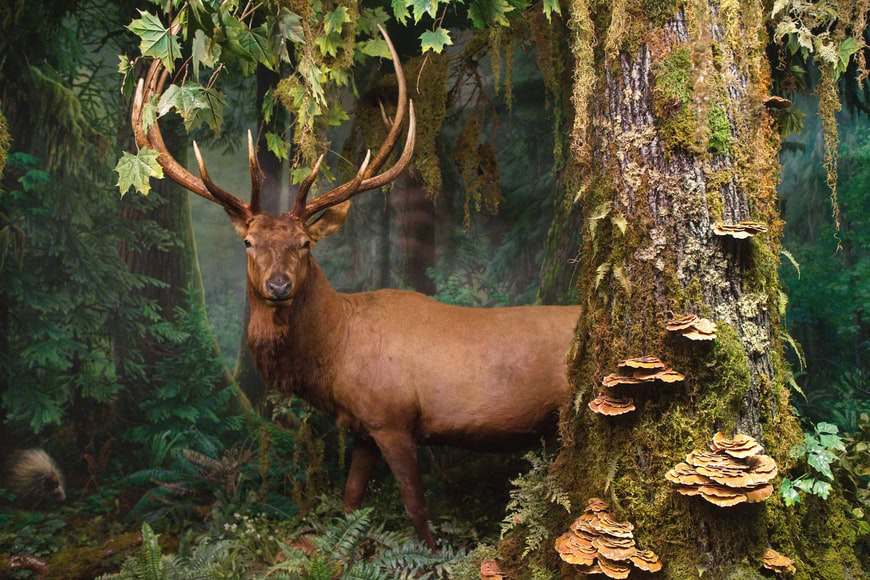

Now let’s discuss the function transforms in detail. Please note that if the input is a PIL image output is also a PIL image and the same for Tensor image.

# 1. adjust_brightness() function:

This functional transform adjusts the brightness of an image. It accepts both PIL image and Tensor Image. It returns a brightness-adjusted PIL (or Tensor) image.  We pass brightness_factor as a parameter to it. The brightness_factor is any non-negative floating-point number. See how the output changes with different brightness_factor–

brightness_factor = 0, black output image.

brightness_factor = 1, the original image.

0 < brightness_factor < 1, a darker output image.

brightness_factor > 1, a brighter output image.

Example:

In the code snippet below, we adjusted the brightness of the image with brightness_factor as 3.0.

In [2]:
output = F.adjust_brightness(image, brightness_factor=3.0)
output.show()


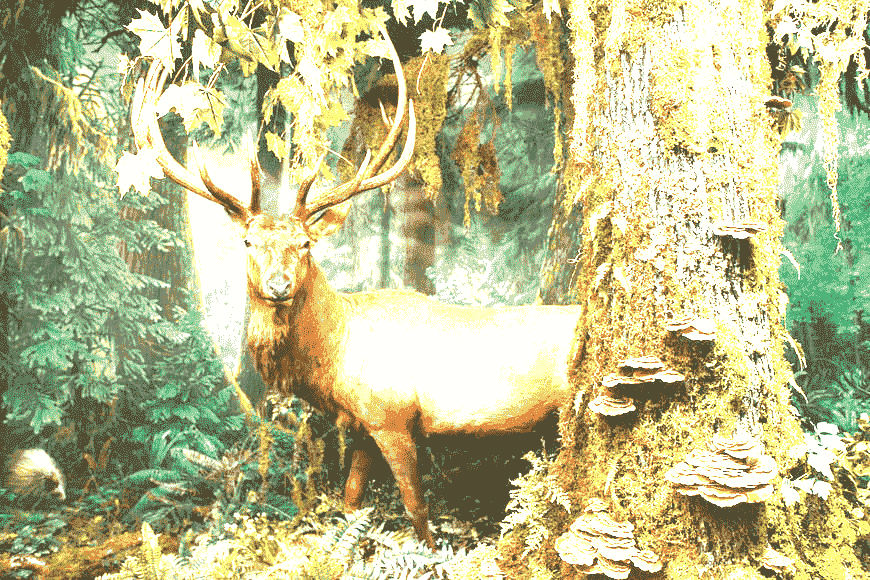

# 2. adjust_contrast() function:floating-point
We can use the functional transform adjust_contrast  to change the contrast of the image. It accepts both PIL image and Tensor Image and returns a contrast adjusted PIL (or Tensor image).  We pass contrast_factor as a parameter to it. The contrast_factor is any non-negative floating point number. See how the output of this transform look like-

Solid gray image if contrast_factor = 0.

The original image if contrast_factor = 1,

To lower contrast use 0 < contrast_factor < 1.

To increase contrast use contrast_factor > 1.

## Example:

In the code snippet, we changed the contrast of the image with contrast_factor as 4.2. Have a look at the output. Note that If the input is a PIL image output is also a PIL image and the same for Tensor image.

In [3]:
output = F.adjust_contrast(image,contrast_factor=4.2)
output.show()


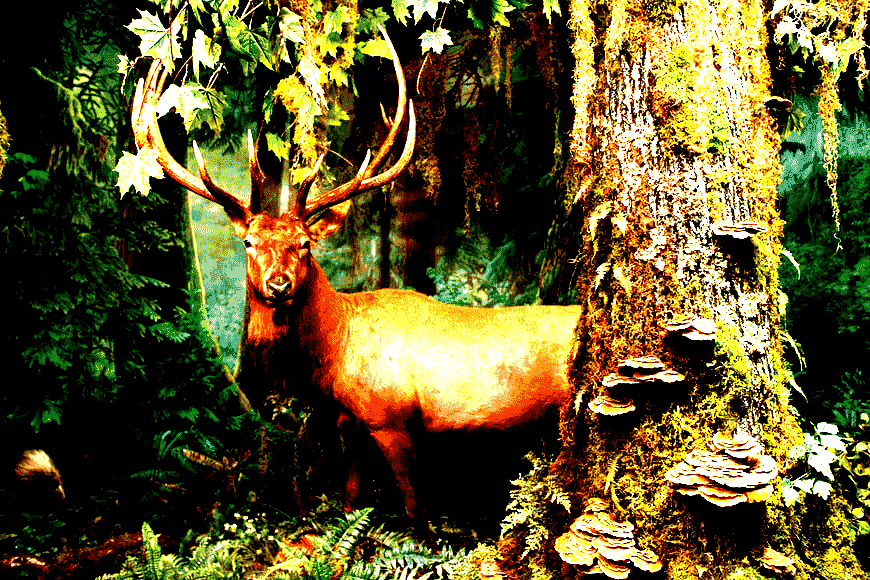

# 3. adjust_hue() function:
The hue of an image can be adjusted using the adjust_hue transform. As the same in the above transforms it also accepts both PIL image and Tensor Image. 

To adjust the hue, the image is first converted to HSV (Hue, Saturation, Value) color space. The image hue is adjusted by converting the image to HSV and the changes are made in the hue channel (H). Then the image is converted back to the original image. 

The important parameter to this transform is hue_factor.  It’s range value is [-0.5, 0.5].  0.5 and -0.5 give the complete opposite of the hue channel in HSV color space in positive and negative direction respectively. Therefore, both hue_factor=-0.5 and hue_factor=0.5 gives an image with complementary colors while hue_factor=0 gives the original image.

## Example:

In the code snipped, we changed the contrast of the image with hue_factor as -0.3. 

In [4]:
output = F.adjust_hue(image,hue_factor=-0.3)
output.show()


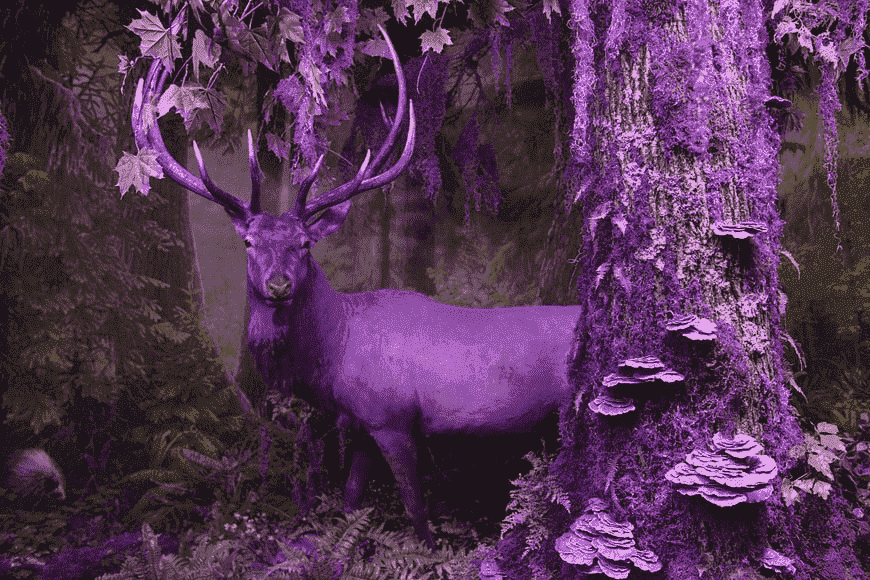

# 4. adjust_saturation() function:
Another important functional transform is adjust_saturation. To enhance the saturation of an image we can use this transform. Accepts both PIL image and Tensor Image. The saturation_factor is passed as the parameter. The saturation_factor is a floating-point value. 

## Example:

In the code snipped, we enhanced the saturation of the input image with saturation_factor = 7.0.

In [5]:
output = F.adjust_saturation(image,saturation_factor=7.0)
output.show()


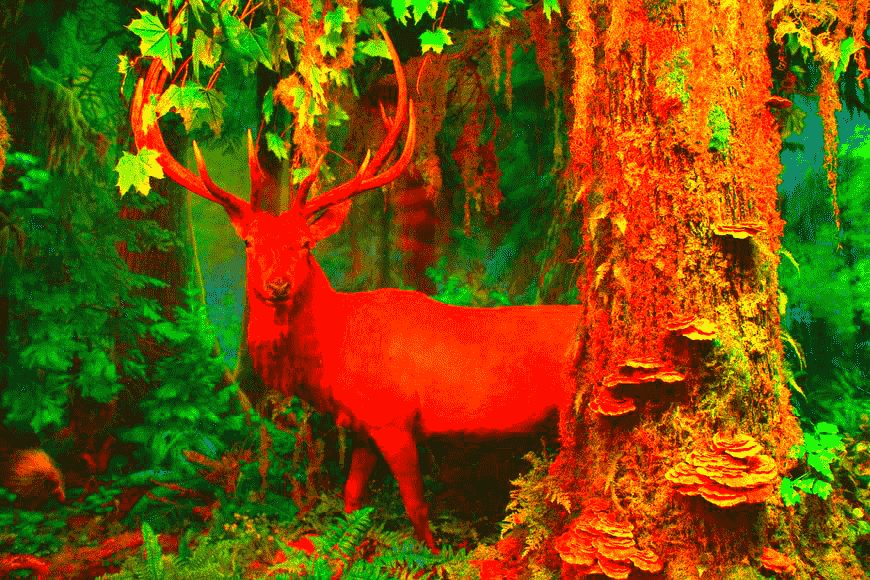

# 5. adjust_sharpness() function:
This transformation adjusts the sharpness of the image. It works for both PIL and Tensor images. The input parameter sharpness_factor is a non-negative floating-point value.  If sharpness_factor is zero, the blurred image is returned. The sharpness_factor value of 1 gives the original image.

## Example:

With the below code snippet, we increased the sharpness by a factor of 5.0. 

In [17]:
!pip install --upgrade torch torchvision
!pip install pillow

In [18]:
from PIL import Image, ImageEnhance

# Open an image
image = Image.open("yourImage.jpg")

# Create an ImageEnhance object
enhancer = ImageEnhance.Sharpness(image)

# Adjust sharpness by a factor (e.g., 5.0 for increased sharpness)
sharpness_factor = 5.0
sharpened_image = enhancer.enhance(sharpness_factor)

# Display or save the sharpened image
sharpened_image.show()

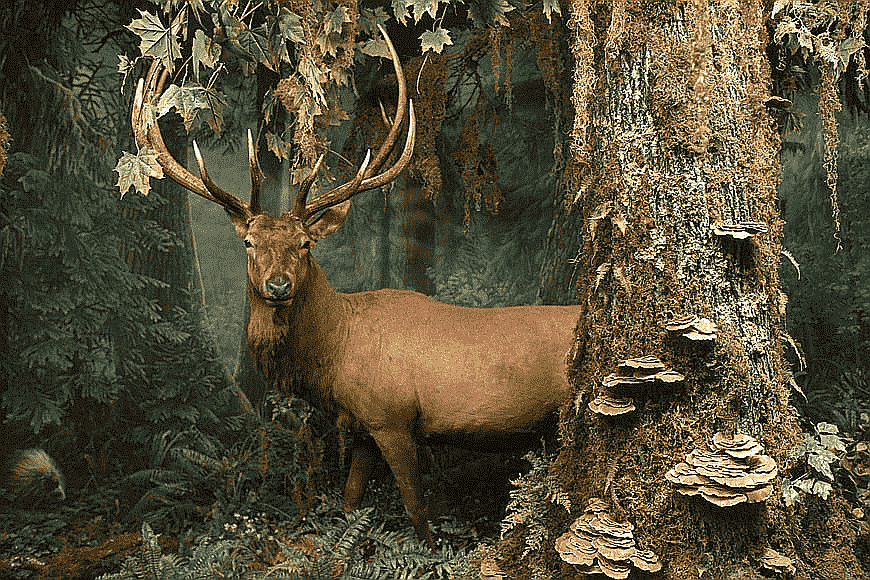

# 6. gaussian_blur() function:
The Gaussian Blur is used to blur or smooth the image. It reduces the noise in the image. To blur an image in PyTorch we can apply the functional transform gaussian_blur. It accepts kernel_size and sigma along with the input image as the parameters. The kernel_size is Gaussian kernel size. It is a sequence of positive and odd integers like (kx, ky) or a single integer (positive and odd) for square kernels. sigma, an optional parameter, is the Gaussian kernel standard deviation.

## Example:

Using the below code snippet, you can smooth or blur the image. You can make necessary changes to kernel_size and sigma for required blurring. 

In [21]:
from PIL import Image, ImageFilter

# Open an image using PIL
image = Image.open("yourImage.jpg")

# Define the Gaussian blur radius
radius = 2  # You can adjust this value

# Apply Gaussian blur to the image
blurred_image = image.filter(ImageFilter.GaussianBlur(radius))

# Display or save the blurred image
blurred_image.show()

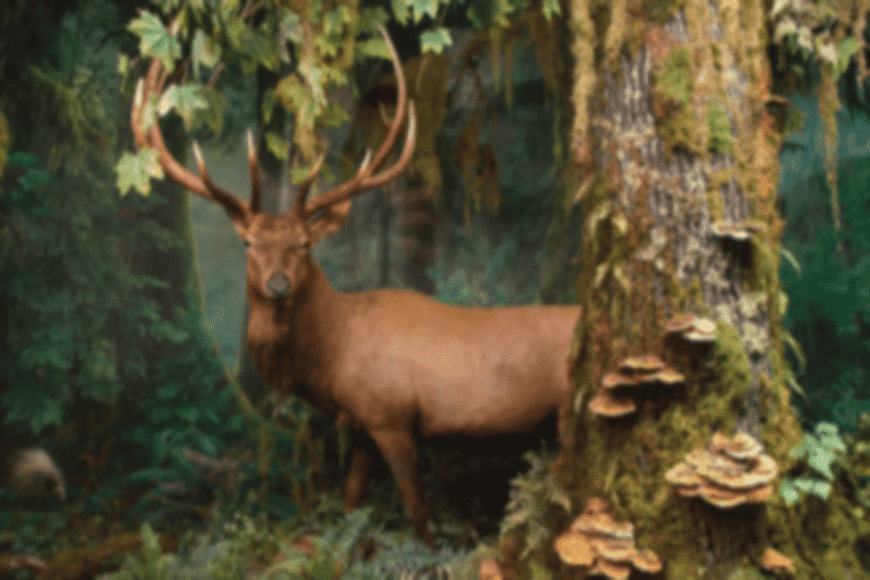

# 7. pil_to_tensor() function:
We can convert a PIL image to a Tensor using this transform. It converts the PIL image to a tensor with the same dtype as the input image.

In [23]:
from torchvision import transforms
from PIL import Image

# Open a PIL image
pil_image = Image.open("yourImage.jpg")

# Define the transformation
pil_to_tensor = transforms.ToTensor()

# Apply the transformation to convert to a tensor
img_tensor = pil_to_tensor(pil_image)

# Now, img_tensor contains the image data as a PyTorch tensor

# 8. to_pil_image() function:
We can convert a tensor or ndarray to a PIL image using to_pil_image transform.



In [25]:
pil_img = F.to_pil_image(img_tensor)

# 9. normalize() function:
Another important functional transform is normalized. It accepts only the tensor images and floats dtype as input. So we need to convert a PIL image to a Tensor image and cast it to float. We have already seen how to convert a PIL image to a tensor and a tensor to PIL image.

## Example:

We normalize the image with mean and std. We computed the mean and std of the input image. You can use the mean and std of the ImageNet dataset.

In [27]:
# Open a PIL image
image = Image.open("yourImage.jpg")

# Define a transformation that normalizes the image
normalize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example values for ImageNet data
])

# Apply the normalization transformation to the image
img_tensor = normalize(image)

# Convert the tensor back to a PIL image (if needed)
output_image = transforms.ToPILImage()(img_tensor)

# Display or save the normalized image
output_image.show()

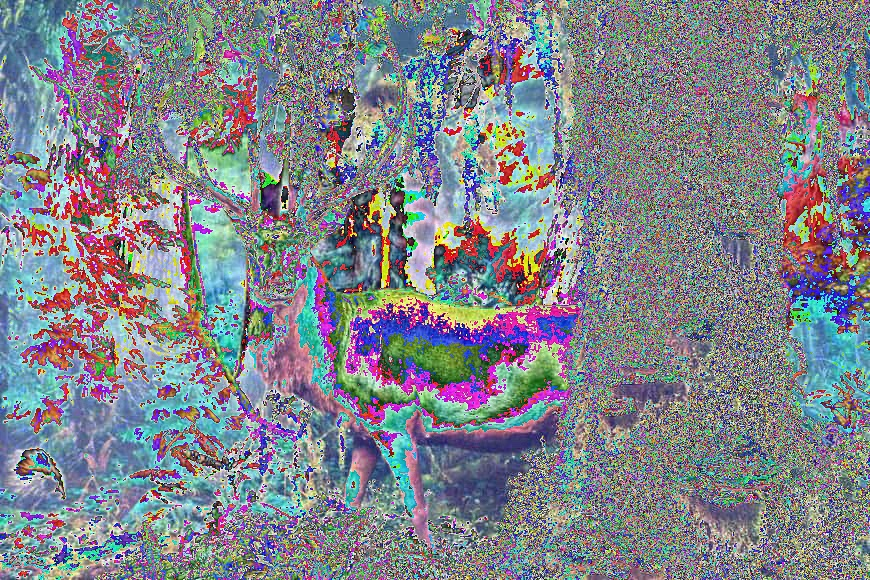

# 10. invert() function:
We can invert the color of an input image using the function transform invert.

In [29]:
from PIL import Image, ImageOps

# Open an image using PIL
image = Image.open("yourImage.jpg")

# Invert the colors of the image
inverted_image = ImageOps.invert(image)

# Display or save the inverted image
inverted_image.show()

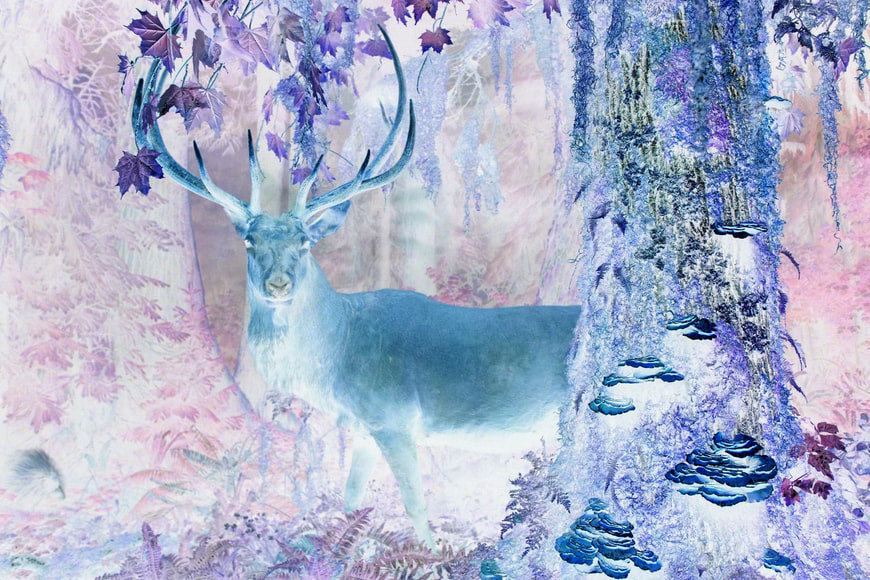